In [1]:
from dataset_generator import generator

file=generator()

Data Preview:
   Age  Annual_Income  Purchased
0   56          28392          0
1   46          50535          1
2   32          98603          1
3   25          72256          0
4   38         109135          1

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            100 non-null    int64
 1   Annual_Income  100 non-null    int64
 2   Purchased      100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB
None

Missing values:
Age              0
Annual_Income    0
Purchased        0
dtype: int64


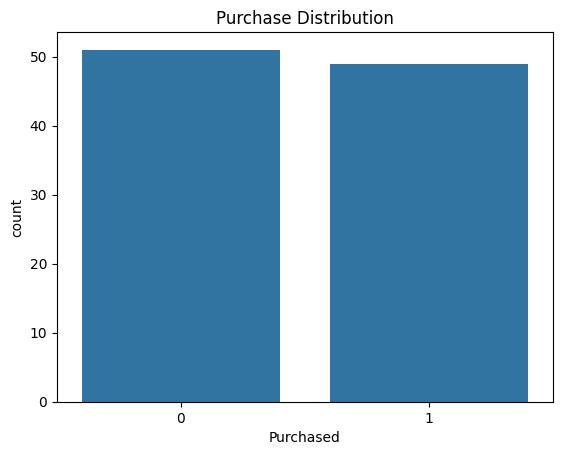


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.81      1.00      0.90        13

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30


Confusion Matrix:
[[14  3]
 [ 0 13]]

Accuracy Score:
0.9


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Load the dataset
data = pd.read_csv('./smartphone_purchase_data.csv')

# Quick look at the data
print("Data Preview:")
print(data.head())
print("\nData Info:")
print(data.info())

# Assuming 'Purchased' is the target variable and others are features
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Visualizing the target variable
sns.countplot(x='Purchased', data=data)
plt.title('Purchase Distribution')
plt.show()

# Define features (X) and target (y)
X = data.drop('Purchased', axis=1)
y = data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)




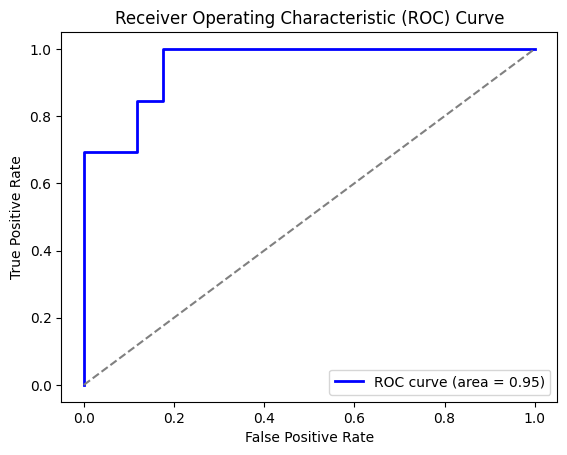

In [5]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()